# Goal

1. Use SNID to open lnw files
2. Find a way to write lnw files the same way
3. Write a function that accepts an lnw file, degrades it, and rewrites it to lnw.

In [1]:
import sys
import os
import glob

In [2]:
HOME_DIR = "/home/2649/"
REPO_DIR = os.path.join(HOME_DIR, "repos")

SESNspectraPCA_DIR = os.path.join(REPO_DIR, "SESNspectraPCA")
SESNspectraLib_DIR = os.path.join(REPO_DIR, "SESNspectraLib")
SESNtemple_DIR = os.path.join(REPO_DIR, "SESNtemple")
dgspec_DIR = os.path.join(REPO_DIR, "dgspec")
adfox_DIR = os.path.join(REPO_DIR, "adfox")

adfox_CODE = os.path.join(adfox_DIR, "astrodash")
SESNspectraPCA_CODE = os.path.join(SESNspectraPCA_DIR, "code")

adfox_DATA = glob.glob(os.path.join(adfox_DIR, "templates/training_set/*lnw"))
SESNtemple_DATA = glob.glob(os.path.join(SESNtemple_DIR, "SNIDtemplates/templates_*/*lnw"))
SESNtemple_DATA1 = glob.glob(os.path.join(SESNtemple_DIR, "templates_adjusted/*lnw"))
SESNtemple_DATA2 = glob.glob(os.path.join(SESNtemple_DIR, "templates_new/*lnw"))
SESNtemple_DATA3 = glob.glob(os.path.join(SESNtemple_DIR, "templates_williamson/*lnw"))

In [3]:
sys.path.insert(0, SESNspectraPCA_DIR)
sys.path.insert(0, SESNspectraLib_DIR)
sys.path.insert(0, SESNtemple_DIR)
sys.path.insert(0, dgspec_DIR)
sys.path.insert(0, adfox_DIR)

sys.path.insert(0, adfox_CODE)
sys.path.insert(0, SESNspectraPCA_CODE)

In [4]:
import shutil

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

import SNIDsn
import SNIDdataset as snid
import SNePCA

import degrade
import kernels
import plotutils
import utils
import classify_PCASVC as cps

import write_lnw 

In [5]:
def degrade_lnw(file, R, savepath):
    snid = SNIDsn.SNIDsn()
    snid.loadSNIDlnw(file)

    degrade.degrade_inplace(snid, R)
    write_lnw.write_lnw(snid, overwrite=True)

    filename = 'new_' + snid.header['SN'] + '.lnw'
    current_file = os.path.join(os.getcwd(), filename)
    new_file = os.path.join(savepath, filename)
    shutil.move(current_file, new_file)

    return new_file, snid

In [6]:
file = "/home/2649/repos/SESNtemple/SNIDtemplates/templates_new/sn2013dk.lnw"
spec = SNIDsn.SNIDsn()
spec.loadSNIDlnw(file)

In [7]:
degraded_file, old_snid = degrade_lnw(file, 100, "/home/2649")
degraded_file

'/home/2649/new_sn2013dk.lnw'

In [8]:
spec_deg = SNIDsn.SNIDsn()
spec_deg.loadSNIDlnw(degraded_file)

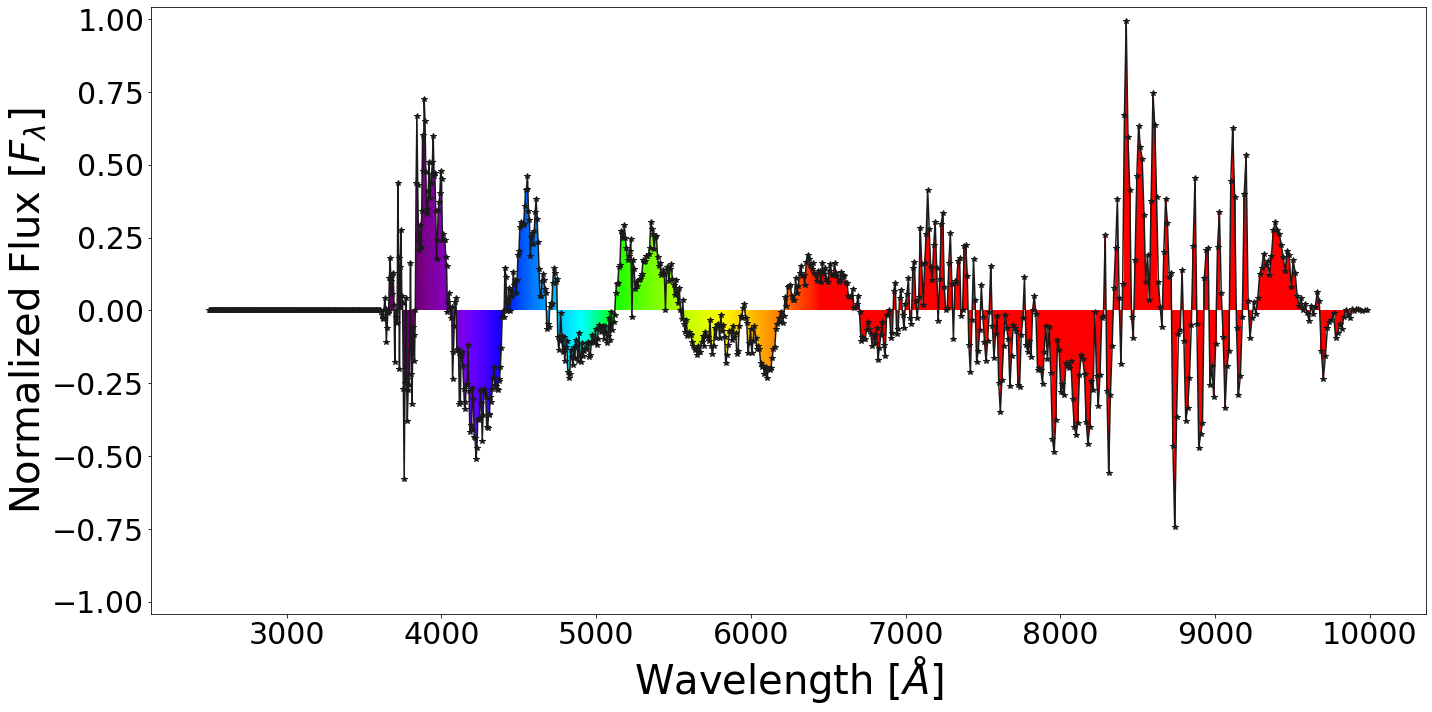

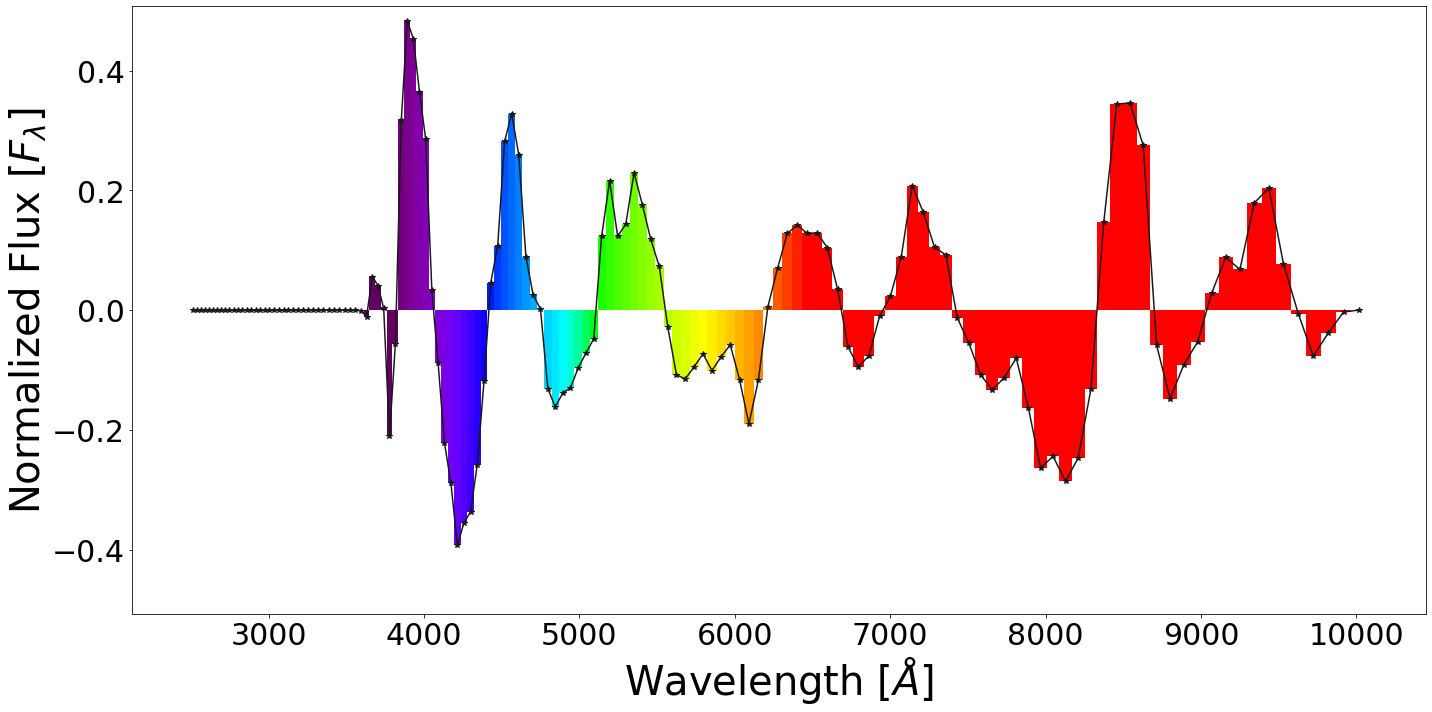

In [9]:
plotutils.plotSpec(spec.wavelengths.astype(float), spec.data.astype(float))
plotutils.plotSpec(spec_deg.wavelengths.astype(float), spec_deg.data.astype(float))

In [10]:
spec_deg.data.astype(float)

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.001     , -0.011     ,  0.056     ,  0.041     ,
        0.003     , -0.20999999, -0.056     ,  0.317     ,  0.48300001,
        0.45300001,  0.36500001,  0.28600001,  0.033     , -0.089     ,
       -0.222     , -0.289     , -0.39300001, -0.35499999, -0.33700001,
       -0.25799999, -0.119     ,  0.046     ,  0.107     ,  0.28200001,
        0.32800001,  0.259     ,  0.089     ,  0.025     ,  0.002     ,
       -0.131     , -0.162     , -0.138     , -0.13      , -0.09

In [11]:
spec.header, spec_deg.header

({'Nspec': 1,
  'Nbins': 1024,
  'WvlStart': 2500.0,
  'WvlEnd': 10000.0,
  'SplineKnots': 10,
  'SN': 'sn2013dk',
  'dm15': -9.99,
  'TypeStr': 'Ic-norm',
  'TypeInt': 3,
  'SubTypeInt': 2},
 {'Nspec': 1,
  'Nbins': 141,
  'WvlStart': 2500.0,
  'WvlEnd': 10000.0,
  'SplineKnots': 10,
  'SN': 'sn2013dk',
  'dm15': -9.99,
  'TypeStr': 'Ic-norm',
  'TypeInt': 3,
  'SubTypeInt': 2})